# Mounting Google Drive and Loading Data


In [ ]:
!unzip -q "Small_set_cats_vs_dogs.zip"

replace Small_set_cats_vs_dogs/test/cat/cat.6000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


# Importing Necessary Libraries

In [ ]:
import tensorflow.keras
import tensorflow

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Reshape
from tensorflow.keras import backend as K 
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [ ]:
print (tensorflow.__version__)

2.4.1


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image


# Hyper-Parameters Initialization

In [ ]:
epochs = 20
batch_size = 50
training_samples = 4000
validation_samples = 600
img_width = 200
img_height = 200 
channels = 3
input_shape = (img_width,img_height,3)

# Data Generator

In [ ]:

train_data_dir = 'Small_set_cats_vs_dogs/train'
validation_data_dir = 'Small_set_cats_vs_dogs/val'


train_datagen = ImageDataGenerator( 
    rescale=1. / 255, 
    shear_range=0.4, 
    zoom_range=0.4, 
    rotation_range=20,
		width_shift_range=0.4,
		height_shift_range=0.4,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest") 


val_datagen = ImageDataGenerator(rescale=1. / 255) 

print("Training images...")

train_generator = train_datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='binary') 

print("Validation images...")

validation_generator = val_datagen.flow_from_directory( 
    validation_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='binary') 
  

Training images...
Found 4000 images belonging to 2 classes.
Validation images...
Found 600 images belonging to 2 classes.


# CNN Model

In [ ]:

model = Sequential()

model.add(Conv2D(64,(3,3), input_shape=input_shape,padding='same',activation='relu'))
model.add(Conv2D(64,(3,3), input_shape=input_shape,padding='same',activation='relu'))
 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(128,(3,3), input_shape=input_shape,padding='same',activation='relu'))
model.add(Conv2D(128,(3,3), input_shape=input_shape,padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(256,(3,3), input_shape=input_shape,padding='same',activation='relu'))
model.add(Conv2D(256,(3,3), input_shape=input_shape,padding='same',activation='relu'))
model.add(Conv2D(256,(3,3), input_shape=input_shape,padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(512,(3,3), input_shape=input_shape,padding='same',activation='relu'))
model.add(Conv2D(512,(3,3), input_shape=input_shape,padding='same',activation='relu'))
model.add(Conv2D(512,(3,3), input_shape=input_shape,padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(512,(3,3), input_shape=input_shape,padding='same',activation='relu'))
model.add(Conv2D(512,(3,3), input_shape=input_shape,padding='same',activation='relu'))
model.add(Conv2D(512,(3,3), input_shape=input_shape,padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#Dense layers

model.add(Flatten())
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dense(4096))
model.add(Activation('relu'))

model.add(Dropout(0.5)) 

model.add(Dense(1))
model.add(Activation('softmax'))


In [ ]:

model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy']) 


# Model Layout and Visualization




In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_143 (Conv2D)          (None, 200, 200, 64)      1792      
_________________________________________________________________
conv2d_144 (Conv2D)          (None, 200, 200, 64)      36928     
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 100, 100, 128)     73856     
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 100, 100, 128)     147584    
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 50, 50, 256)     

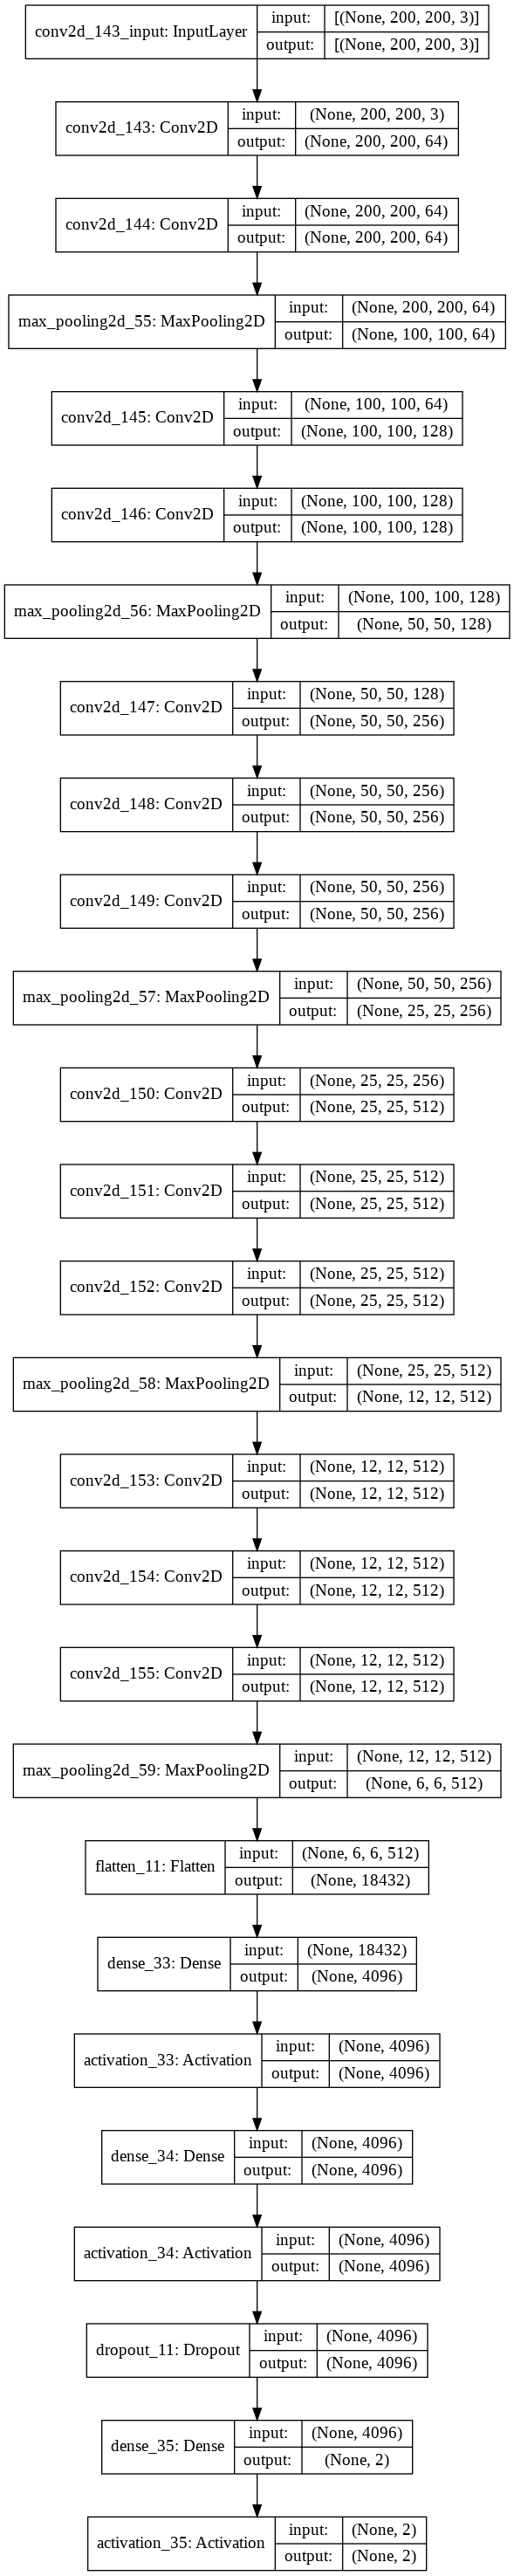

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Training and Validation

In [ ]:
history = model.fit(train_generator, 
    steps_per_epoch = (training_samples // batch_size), 
    epochs = epochs, validation_data = validation_generator, 
    validation_steps = (validation_samples // batch_size)) 

Epoch 1/20
80/80 [==============================] - 64s 781ms/step - loss: 3402.2817 - accuracy: 0.5047 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/20
80/80 [==============================] - 62s 772ms/step - loss: 0.6938 - accuracy: 0.4958 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/20
80/80 [==============================] - 62s 770ms/step - loss: 0.6934 - accuracy: 0.4939 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/20
80/80 [==============================] - 62s 769ms/step - loss: 0.6934 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/20
80/80 [==============================] - 62s 767ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/20
80/80 [==============================] - 62s 766ms/step - loss: 0.6933 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/20
80/80 [==============================] - 61s 764ms/step - loss: 0.6930 - accuracy: 0.5215 - val_loss: 0.6933 - val_accuracy: 0.5

KeyboardInterrupt: ignored

In [ ]:
model.save_weights('model_saved.h5') 

# Evaluating the test data

In [ ]:
test_data_dir = 'Small_set_cats_vs_dogs/test'

test_datagen = ImageDataGenerator(rescale=1. / 255) 

test_generator = test_datagen.flow_from_directory( 
    test_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='binary') 



Found 200 images belonging to 2 classes.


In [ ]:
model.evaluate_generator(test_generator,  verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


2/2 - 1s - loss: 0.6932 - accuracy: 0.5000


[0.6931548118591309, 0.5]

# Plotting Accuracy and Loss Graph

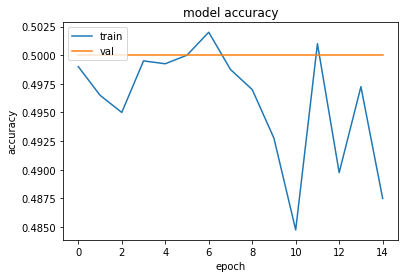

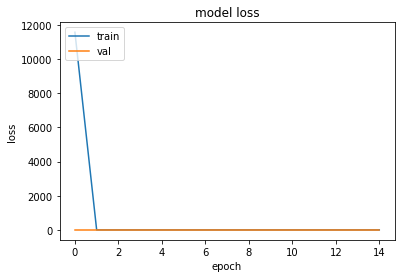

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()